# Coding......

## Search Policy

In [65]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.datasets import load_boston

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

#### Input: string -> dict

In [4]:
test_string = "{name:'澳门', geoCoord:[113.54, 22.19]}"

In [6]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [9]:
re.findall(pattern, test_string)[0]

('澳门', '113.54', '22.19')

In [11]:
pattern.findall(test_string)[0]

('澳门', '113.54', '22.19')

In [14]:
city_location = {}
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info: continue
    city, long, lat = city_info[0]
    long, lat = float(long), float(lat)
    city_location[city] = (long, lat)

In [15]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [20]:
def get_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    #longitude latitude 
    lat1 ,lon1 = origin
    lat2, lon2 = destination
    radius = 6371 #km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [18]:
def get_geo_distance(city1, city2):
    return get_distance(city_location[city1], city_location[city2])

In [21]:
get_geo_distance('北京','上海')

727.52769688981

In [25]:
city_graph = nx.Graph()

In [26]:
city_graph.add_nodes_from(list(city_location.keys()))

In [28]:
%matplotlib inline

In [31]:
plt.rcParams['font.sans-serif']=['SimHei']

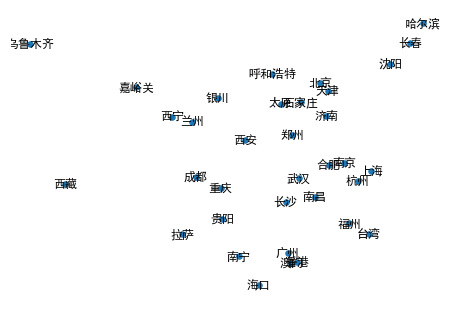

In [34]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [39]:
simple_connection_info = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

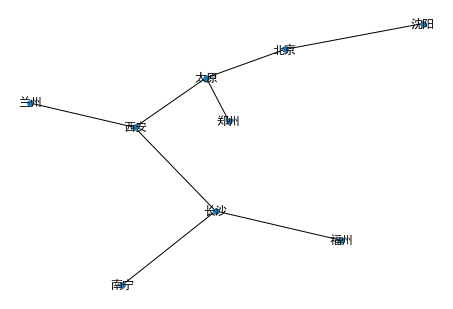

In [41]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=30)

In [48]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    visited = set()
    while pathes: #we find pathes
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        successors = connection_graph[frontier]
        
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visited.add(frontier)
        
        pathes = sort_candidate(pathes) #增加一个排序函数，对结果进行排序

In [42]:
def transfer_station_first(pathes):
    return sorted(pathes, key=len)

In [44]:
def transfer_as_much_as_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [46]:
def shortest_path_first(pathes):
    if len(pathes) <=1 : return pathes
    
    def get_path_distance(path):
        distance = 0
        for i in len(pathes):
            distance += get_geo_distance(pathes[i] + pathes[i + 1])
        #for station in path[:-1]:
        #    distance += get_geo_distance(station, path[-1])
            
        return distance
    
    return sorted(pathes, key=get_path_distance)

In [49]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [50]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [51]:
pretty_print(search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first))

兰州🚗->西安🚗->长沙🚗->福州


In [57]:
city_connection = defaultdict(list)

In [58]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < 300:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [59]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',


In [61]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_station_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


In [63]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_as_possible))

北京🚗->石家庄🚗->郑州🚗->武汉🚗->长沙🚗->广州


### 正则略过，直接应用

### Machine Learning